In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.9 MB/s eta 0:00:00


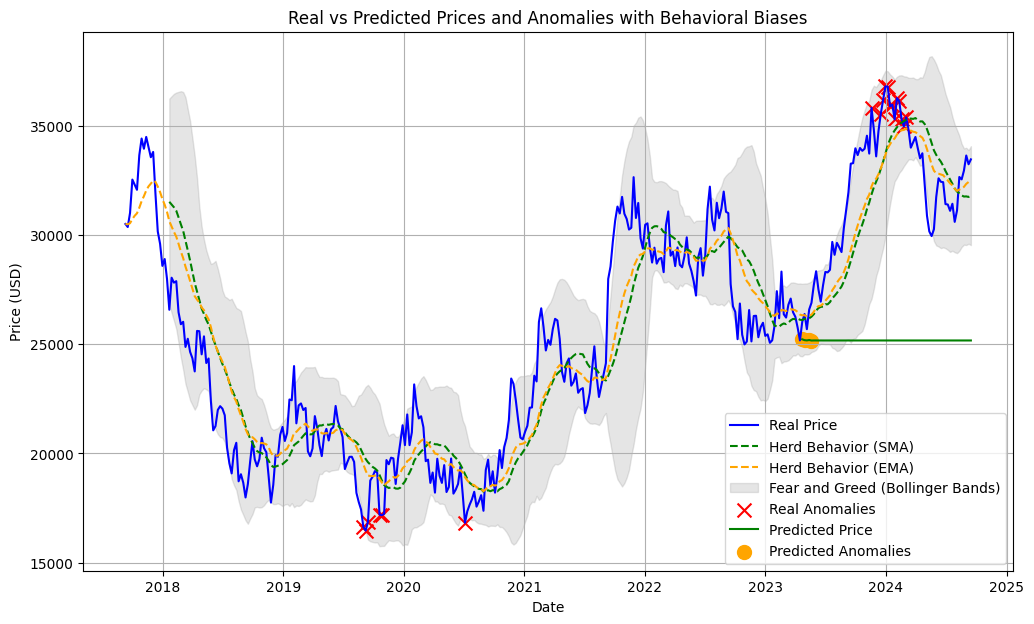

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: IsolationForest(contamination=0.05)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
import shap

# Simulated Bitcoin data (replace with real dataset)
np.random.seed(42)
dates = pd.date_range('2017-09-07', '2024-09-15', freq='W')
price = np.cumsum(np.random.randn(len(dates)) * 1000) + 30000  # Simulated prices

bitcoin_data = pd.DataFrame({
    'Date': dates,
    'Close': price,
})

# Step 1: Calculate behavioral metrics
bitcoin_data['SMA_20'] = bitcoin_data['Close'].rolling(window=20).mean()
bitcoin_data['EMA_20'] = bitcoin_data['Close'].ewm(span=20, adjust=False).mean()
bitcoin_data['Bollinger_Upper'] = bitcoin_data['Close'].rolling(window=20).mean() + 2 * bitcoin_data['Close'].rolling(window=20).std()
bitcoin_data['Bollinger_Lower'] = bitcoin_data['Close'].rolling(window=20).mean() - 2 * bitcoin_data['Close'].rolling(window=20).std()

# Step 2: Train Isolation Forest for anomaly detection on real data
iso_forest = IsolationForest(contamination=0.05)
bitcoin_data['anomaly'] = iso_forest.fit_predict(bitcoin_data[['Close']])

# Step 3: Train ARIMA model for future price prediction
train_data = bitcoin_data['Close'][:int(0.8*len(bitcoin_data))]
test_data = bitcoin_data['Close'][int(0.8*len(bitcoin_data)):]

model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Predict future prices
predicted_prices = model_fit.forecast(steps=len(test_data))

# Step 4: Create DataFrame for predicted data and anomalies
predicted_df = bitcoin_data[int(0.8*len(bitcoin_data)):].copy()
predicted_df['Predicted_Close'] = predicted_prices.values

# Detect anomalies in predicted data
iso_forest_pred = IsolationForest(contamination=0.05)
predicted_df['anomaly_predicted'] = iso_forest_pred.fit_predict(predicted_df[['Predicted_Close']])

# Step 5: Plot Real and Predicted Anomalies with Behavioral Biases
plt.figure(figsize=(12, 7))

# Plot real prices and anomalies
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Real Price', color='blue')
plt.plot(bitcoin_data['Date'], bitcoin_data['SMA_20'], '--', label='Herd Behavior (SMA)', color='green')
plt.plot(bitcoin_data['Date'], bitcoin_data['EMA_20'], '--', label='Herd Behavior (EMA)', color='orange')
plt.fill_between(bitcoin_data['Date'], bitcoin_data['Bollinger_Upper'], bitcoin_data['Bollinger_Lower'], color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')

plt.scatter(bitcoin_data[bitcoin_data['anomaly'] == -1]['Date'],
            bitcoin_data[bitcoin_data['anomaly'] == -1]['Close'],
            color='red', label='Real Anomalies', marker='x', s=100)

# Plot predicted prices and anomalies
plt.plot(predicted_df['Date'], predicted_df['Predicted_Close'], label='Predicted Price', color='green')
plt.scatter(predicted_df[predicted_df['anomaly_predicted'] == -1]['Date'],
            predicted_df[predicted_df['anomaly_predicted'] == -1]['Predicted_Close'],
            color='orange', label='Predicted Anomalies', marker='o', s=100)

plt.title('Real vs Predicted Prices and Anomalies with Behavioral Biases')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: SHAP explainability (mocked since this is simulated data)
explainer = shap.Explainer(iso_forest, bitcoin_data[['Close']])
shap_values = explainer(bitcoin_data[['Close']])

# SHAP summary plot for anomalies
shap.summary_plot(shap_values[bitcoin_data['anomaly'] == -1], bitcoin_data[['Close']])


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0882 - val_loss: 0.0307
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0031 - val_loss: 0.0073
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3198655744.0000 - val_loss: 3274132736.0000
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3193454336.0000 - val_loss: 3274132736.0000
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3209597440.0000 - val_loss: 3274132736.0000
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3212783872.0000 - val_loss: 3274132736.0000
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3184545792.0000 - val_loss: 3274132736.0000
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3210414848.0000 - val_loss: 3274132736.0000
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3223128064.0000 - val_loss: 3274132736.0000
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3185070080.0000 - val_loss: 3274132736.0000
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3213558272.0000 - val_loss: 3274132736.0000
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3214950400.0000 - val_loss: 3274132736.0000


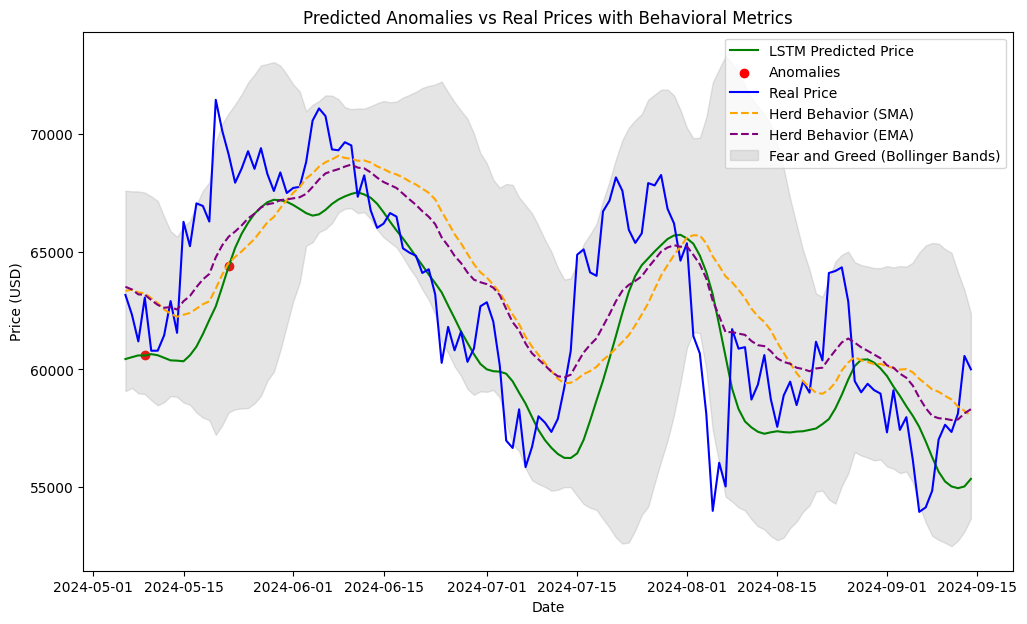

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        16
           1       0.37      0.64      0.47        11

    accuracy                           0.41        27
   macro avg       0.43      0.44      0.40        27
weighted avg       0.45      0.41      0.39        27



In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from sklearn.metrics import classification_report
import shap

# Step 1: Fetch Bitcoin data using yfinance
bitcoin_data = yf.download('BTC-USD', start='2022-09-07', end='2024-09-15')
bitcoin_data = bitcoin_data[['Close']].copy()

# Step 2: Calculate behavioral metrics (SMA, EMA, Bollinger Bands)
bitcoin_data['SMA_20'] = bitcoin_data['Close'].rolling(window=20).mean()
bitcoin_data['EMA_20'] = bitcoin_data['Close'].ewm(span=20, adjust=False).mean()
bitcoin_data['Bollinger_Upper'] = bitcoin_data['Close'].rolling(window=20).mean() + 2 * bitcoin_data['Close'].rolling(window=20).std()
bitcoin_data['Bollinger_Lower'] = bitcoin_data['Close'].rolling(window=20).mean() - 2 * bitcoin_data['Close'].rolling(window=20).std()

# Drop rows with missing values (due to rolling calculations)
bitcoin_data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bitcoin_data[['Close']])

# Step 3: LSTM for Time-Series Forecasting
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 60  # Use 60 days of historical data to predict the next day
X_lstm = create_sequences(scaled_data, seq_length)
y_lstm = scaled_data[seq_length:]

# Split the data into training and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Predict future prices
predicted_prices_lstm = lstm_model.predict(X_test_lstm)

# Step 4: Feature Engineering for Random Forest (Use LSTM predictions and behavioral metrics)
X_rf = np.hstack([predicted_prices_lstm,
                  bitcoin_data['SMA_20'].values[-len(predicted_prices_lstm):].reshape(-1, 1),
                  bitcoin_data['EMA_20'].values[-len(predicted_prices_lstm):].reshape(-1, 1),
                  bitcoin_data['Bollinger_Upper'].values[-len(predicted_prices_lstm):].reshape(-1, 1),
                  bitcoin_data['Bollinger_Lower'].values[-len(predicted_prices_lstm):].reshape(-1, 1)])

y_rf = np.random.randint(0, 2, size=len(predicted_prices_lstm))  # Dummy labels (replace with actual labels if available)

# Train Random Forest on LSTM predictions and behavioral features
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_rf, y_train_rf)

# Step 5: Autoencoder for Anomaly Detection
input_dim = X_train_rf.shape[1]
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_rf, X_train_rf, epochs=20, batch_size=32, validation_data=(X_test_rf, X_test_rf))

# Calculate reconstruction error
reconstructed = autoencoder.predict(X_test_rf)
reconstruction_error = np.mean(np.abs(X_test_rf - reconstructed), axis=1)

# Threshold for anomaly detection
anomaly_threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > anomaly_threshold

# Align anomaly indices with the time-series data length
anomaly_indices = np.where(anomalies)[0]  # Get indices of detected anomalies

# Step 6: Visualization with Behavioral Metrics
plt.figure(figsize=(12, 7))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], scaler.inverse_transform(predicted_prices_lstm), label='LSTM Predicted Price', color='green')
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomaly_indices],
            scaler.inverse_transform(predicted_prices_lstm)[anomaly_indices],
            color='red', label='Anomalies')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['EMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (EMA)', color='purple')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Bollinger_Upper'][-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Lower'][-len(predicted_prices_lstm):], color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')
plt.title('Predicted Anomalies vs Real Prices with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Print Random Forest classification report
y_pred_rf = rf_model.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_rf))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 3203693824.0000 - val_loss: 3274106880.0000
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3188451840.0000 - val_loss: 3274106880.0000
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3221061632.0000 - val_loss: 3274106880.0000
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3174902528.0000 - val_loss: 3274106880.0000
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3225064960.0000 - val_loss: 3274106880.0000
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3196022528.0000 - val_loss: 3274106880.0000
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3209044992.0000 - val_loss: 3274106880.0000
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3216290560.0000 - val_loss: 3274106880.0000
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3218599680.0000 - val_loss: 3274106880.0000
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3198252032.0000 - val_loss: 3274106880.0000


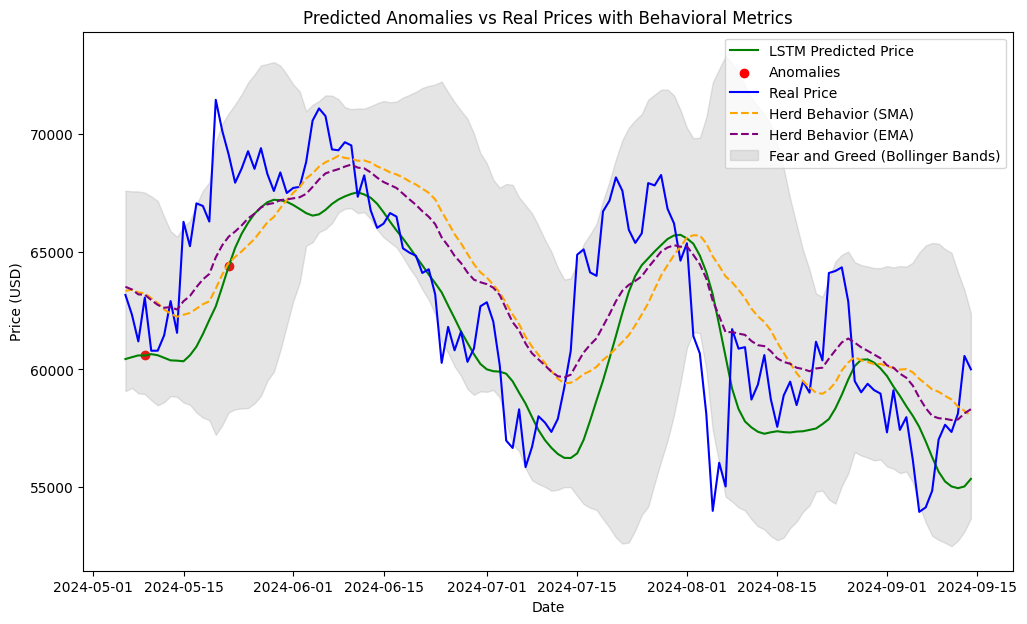

Reconstruction error (mean): 51013.11724675856
Anomaly threshold (95th percentile): 54869.19848099363
Detected anomalies: 2


In [ ]:
# Step 5: Autoencoder for Anomaly Detection
input_dim = X_train_rf.shape[1]
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_rf, X_train_rf, epochs=20, batch_size=32, validation_data=(X_test_rf, X_test_rf))

# Calculate reconstruction error
reconstructed = autoencoder.predict(X_test_rf)
reconstruction_error = np.mean(np.abs(X_test_rf - reconstructed), axis=1)

# Threshold for anomaly detection (95th percentile of reconstruction error)
anomaly_threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > anomaly_threshold

# Align anomaly indices with the time-series data length
anomaly_indices = np.where(anomalies)[0]  # Get indices of detected anomalies

# Step 6: Visualization with Behavioral Metrics
plt.figure(figsize=(12, 7))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], scaler.inverse_transform(predicted_prices_lstm), label='LSTM Predicted Price', color='green')
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomaly_indices],
            scaler.inverse_transform(predicted_prices_lstm)[anomaly_indices],
            color='red', label='Anomalies')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['EMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (EMA)', color='purple')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Bollinger_Upper'][-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Lower'][-len(predicted_prices_lstm):], color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')
plt.title('Predicted Anomalies vs Real Prices with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Print reconstruction error summary
print(f"Reconstruction error (mean): {np.mean(reconstruction_error)}")
print(f"Anomaly threshold (95th percentile): {anomaly_threshold}")
print(f"Detected anomalies: {len(anomalies[anomalies == True])}")

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model
import shap

# Step 1: Load Bitcoin Data (yfinance)
bitcoin_data = yf.download('BTC-USD', start='2017-09-07', end='2024-09-15')
bitcoin_data = bitcoin_data[['Close', 'Volume']].copy()

# Step 2: Preprocessing - Calculate Behavioral Metrics
bitcoin_data['SMA_20'] = bitcoin_data['Close'].rolling(window=20).mean()
bitcoin_data['EMA_20'] = bitcoin_data['Close'].ewm(span=20, adjust=False).mean()
bitcoin_data['Volatility'] = bitcoin_data['Close'].rolling(window=20).std()  # Volatility as a behavioral metric

# Bollinger Bands
bitcoin_data['Bollinger_Upper'] = bitcoin_data['SMA_20'] + (bitcoin_data['Volatility'] * 2)
bitcoin_data['Bollinger_Lower'] = bitcoin_data['SMA_20'] - (bitcoin_data['Volatility'] * 2)

# Drop NaN values from rolling calculations
bitcoin_data.dropna(inplace=True)

# Step 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bitcoin_data[['Close']])

# Step 4: Prepare LSTM Sequences for Prediction and Flatten for Autoencoder
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 60  # Use 60 days of historical data to predict the next day
X_lstm = create_sequences(scaled_data, seq_length)
y_lstm = scaled_data[seq_length:]

# Flatten the LSTM sequence data for the Autoencoder
X_train_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1]))

# Step 5: Build LSTM Model for Time-Series Forecasting
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_lstm, y_lstm, epochs=20, batch_size=32)

# Step 6: Predict Future Prices
predicted_prices_lstm = lstm_model.predict(X_lstm[-len(X_lstm):])
real_prices = y_lstm[-len(X_lstm):]

# Step 7: Anomaly Detection with Autoencoder (reshaped for input compatibility)
input_dim = X_train_lstm.shape[-1]
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_lstm, X_train_lstm, epochs=20, batch_size=32)

# Calculate reconstruction error for anomaly detection
reconstructed = autoencoder.predict(X_train_lstm)
reconstruction_error = np.mean(np.abs(X_train_lstm - reconstructed), axis=1)

# Set anomaly threshold (95th percentile of reconstruction error)
anomaly_threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > anomaly_threshold

# Step 8: Visualization with Behavioral Metrics and Explainable AI (SHAP)
plt.figure(figsize=(12, 7))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], scaler.inverse_transform(predicted_prices_lstm), label='LSTM Predicted Price', color='green')
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomalies],
            scaler.inverse_transform(predicted_prices_lstm)[anomalies],
            color='red', label='Predicted Anomalies')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['EMA_20'][-len(predicted_prices_lstm):], '--', label='Momentum (EMA)', color='purple')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Bollinger_Upper'][-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Lower'][-len(predicted_prices_lstm):], color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')
plt.title('Predicted Anomalies with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
import shap

# Step 1: Define a wrapper to flatten the input and pass it to the LSTM model for SHAP
def lstm_predict_2d(X):
    # Reshape the 2D data back into the LSTM's 3D shape for prediction
    X_reshaped = X.reshape((X.shape[0], seq_length, 1))
    return lstm_model.predict(X_reshaped)

# Step 2: Reshape the input data to 2D for SHAP
X_lstm_reshaped = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1]))  # Flatten the LSTM input

# Step 3: Use SHAP KernelExplainer with the LSTM model
explainer = shap.KernelExplainer(lstm_predict_2d, X_lstm_reshaped)

# Step 4: Calculate SHAP values
shap_values = explainer.shap_values(X_lstm_reshaped)

# Step 5: Plot SHAP values with behavioral metrics
shap.summary_plot(shap_values, features=bitcoin_data[['SMA_20', 'EMA_20', 'Volatility', 'Bollinger_Upper', 'Bollinger_Lower']].values[-len(X_lstm):],
                  feature_names=['Herd Behavior (SMA)', 'Momentum (EMA)', 'Volatility', 'Fear (Bollinger Upper)', 'Greed (Bollinger Lower)'])
